## How to Train YOLOv8 Object Detection on a Custom Dataset

In [ ]:
!nvidia-smi

Sun Dec 10 07:25:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.1/660.1 kB 8.8 MB/s eta 0:00:00


## Install YOLOv8

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.68 GB
CPU                 Intel Xeon 2.00GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


## Train YOLOv8 Model on Custom Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("jack-danos-r6gar").project("tennis-balls-rai2k")
dataset = project.version(11).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.225, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Tennis-Balls-11 in yolov8:: 100%|██████████| 3294/3294 [00:00<00:00, 6376.03it/s]


In [ ]:
print(dataset.location)
os.getcwd()

/content/Tennis-Balls-11


'/content'

In [ ]:
!ls -l /content/Tennis-Balls-11/

total 24
-rw-r--r-- 1 root root  307 Dec 10 07:26 data.yaml
-rw-r--r-- 1 root root  163 Dec 10 07:26 README.dataset.txt
-rw-r--r-- 1 root root 1475 Dec 10 07:26 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Dec 10 07:26 test
drwxr-xr-x 4 root root 4096 Dec 10 07:26 train
drwxr-xr-x 4 root root 4096 Dec 10 07:26 valid


In [ ]:
with open('/content/Tennis-Balls-11/data.yaml', 'r') as file:
    print(file.read())

names:
- Tennis ball
nc: 1
roboflow:
  license: CC BY 4.0
  project: tennis-balls-rai2k
  url: https://universe.roboflow.com/jack-danos-r6gar/tennis-balls-rai2k/dataset/11
  version: 11
  workspace: jack-danos-r6gar
test: ../test/images
train: Tennis-Balls-11/train/images
val: Tennis-Balls-11/valid/images



In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Tennis-Balls-11/data.yaml epochs=20 imgsz=629


Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Tennis-Balls-11/data.yaml, epochs=20, patience=50, batch=16, imgsz=629, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, form

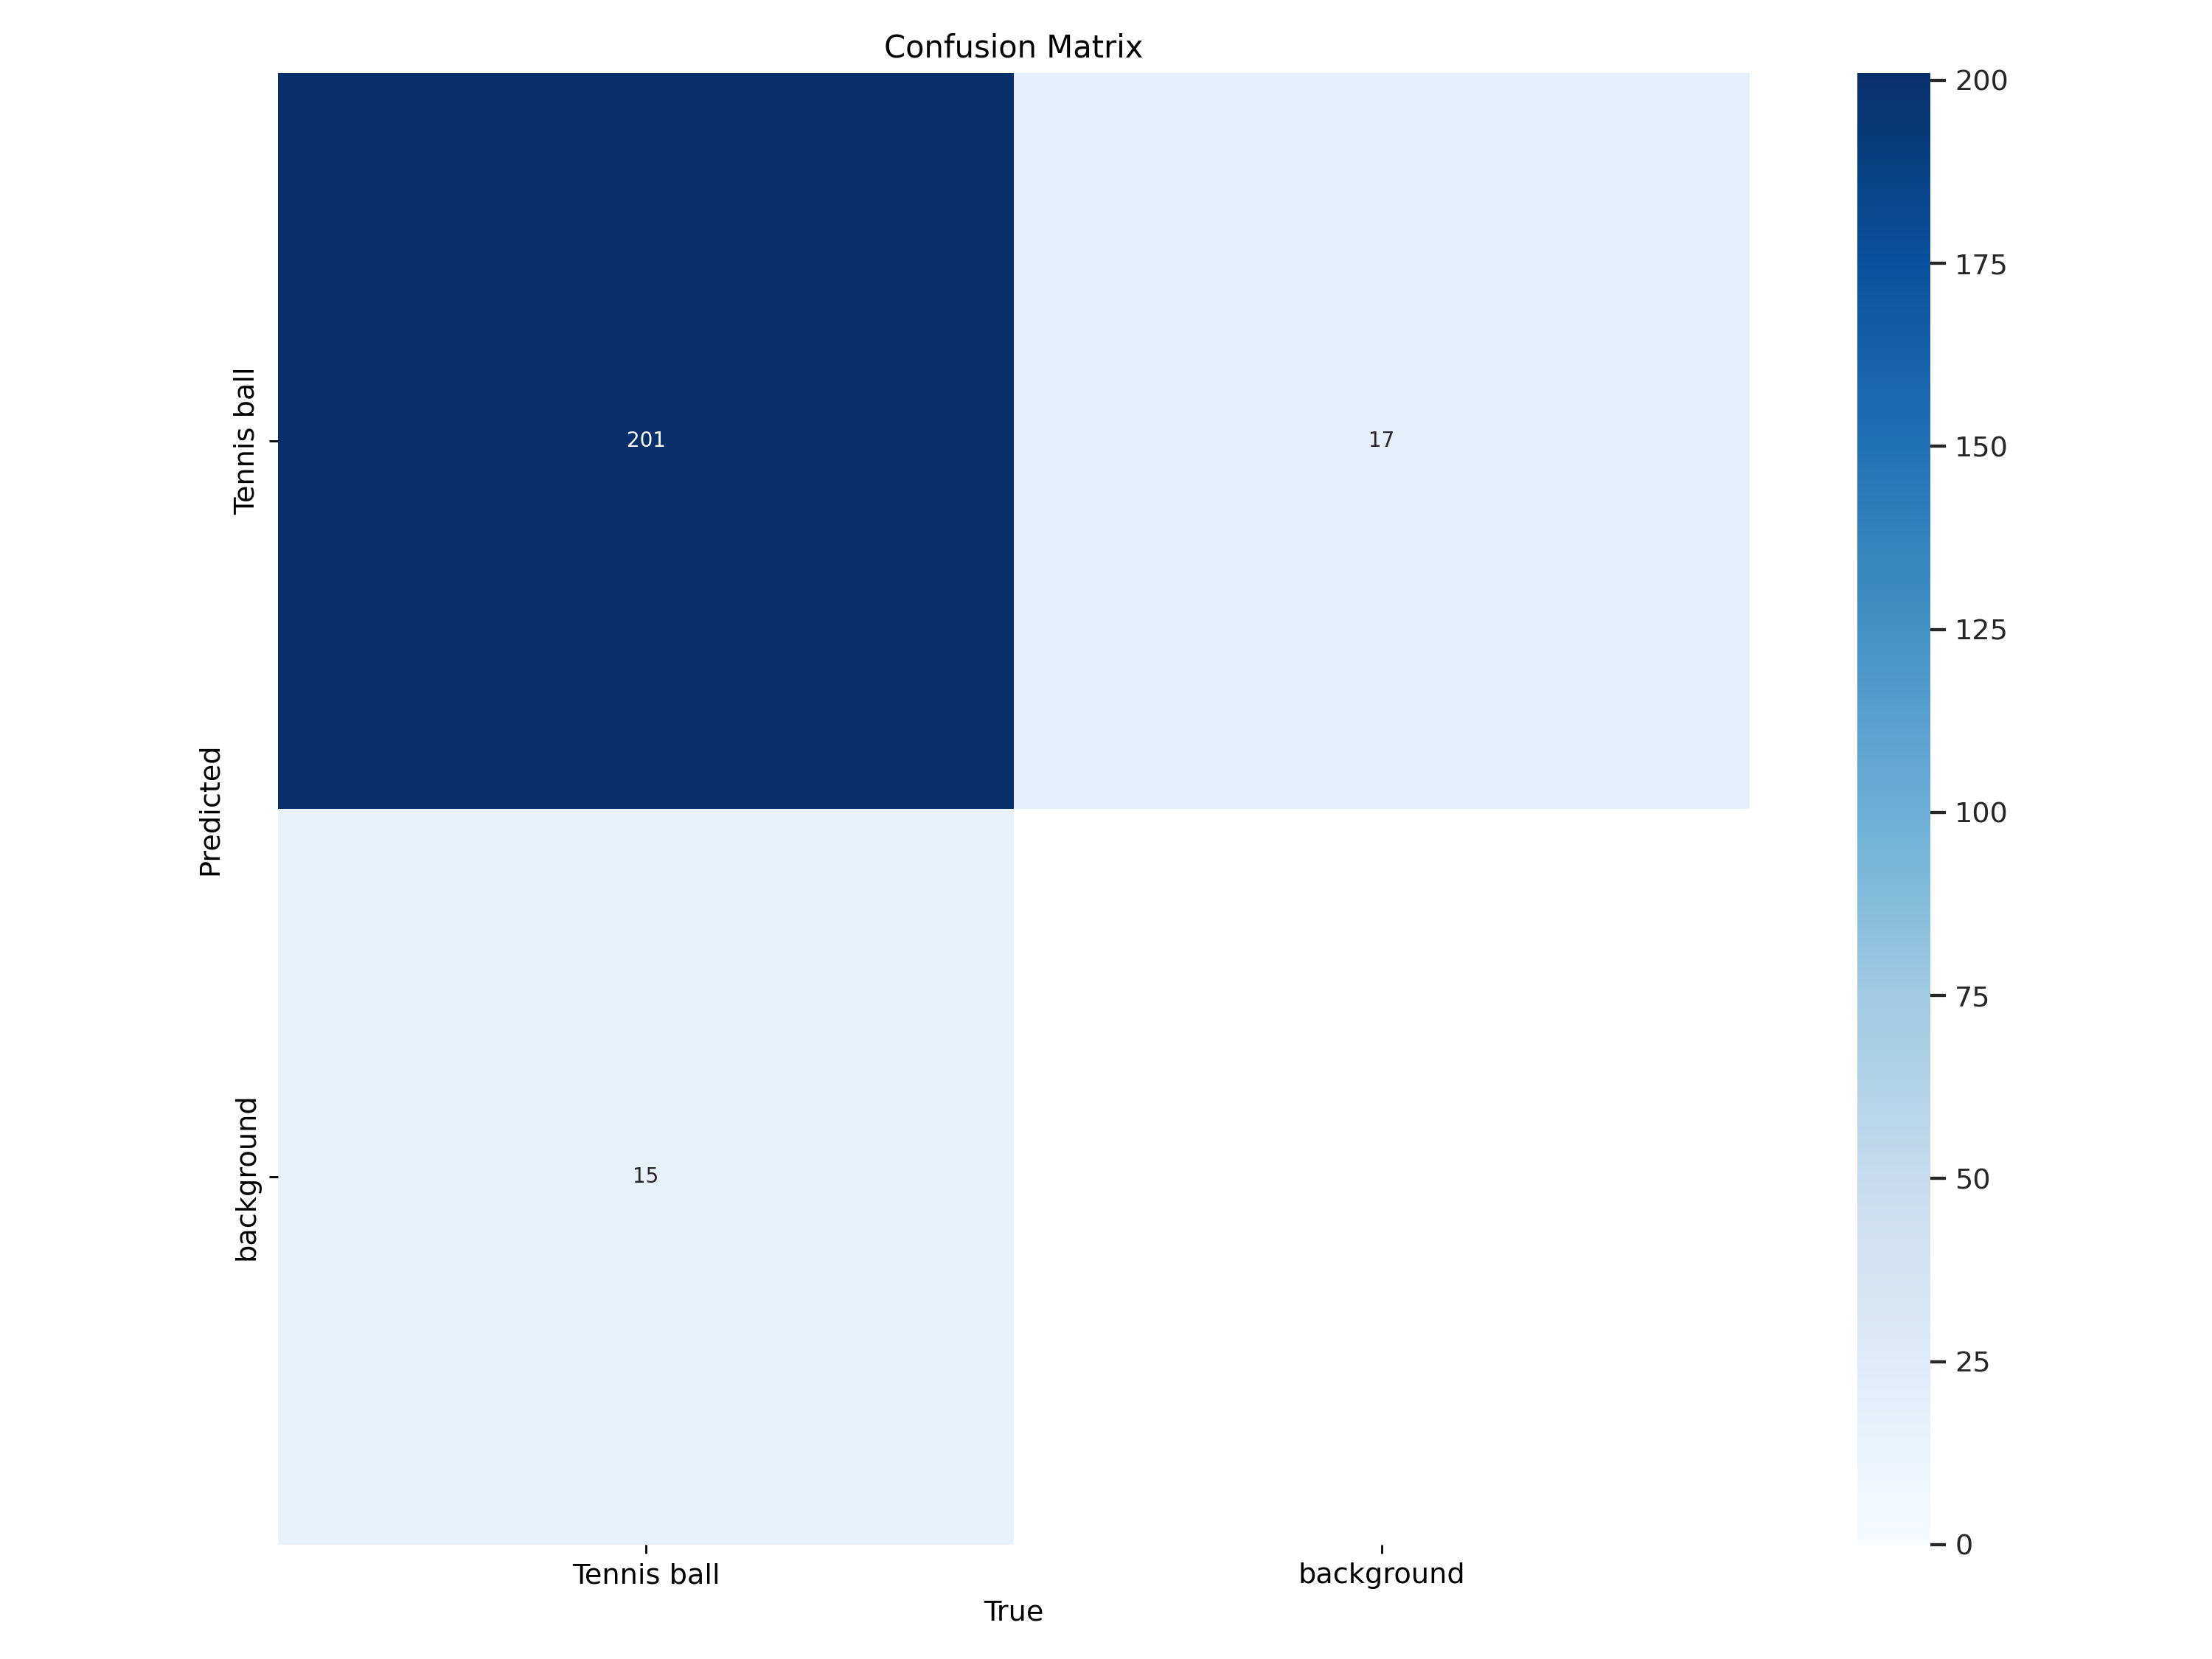

In [ ]:
Image(filename=f'/content/runs/detect/train8/confusion_matrix.png', width=600)

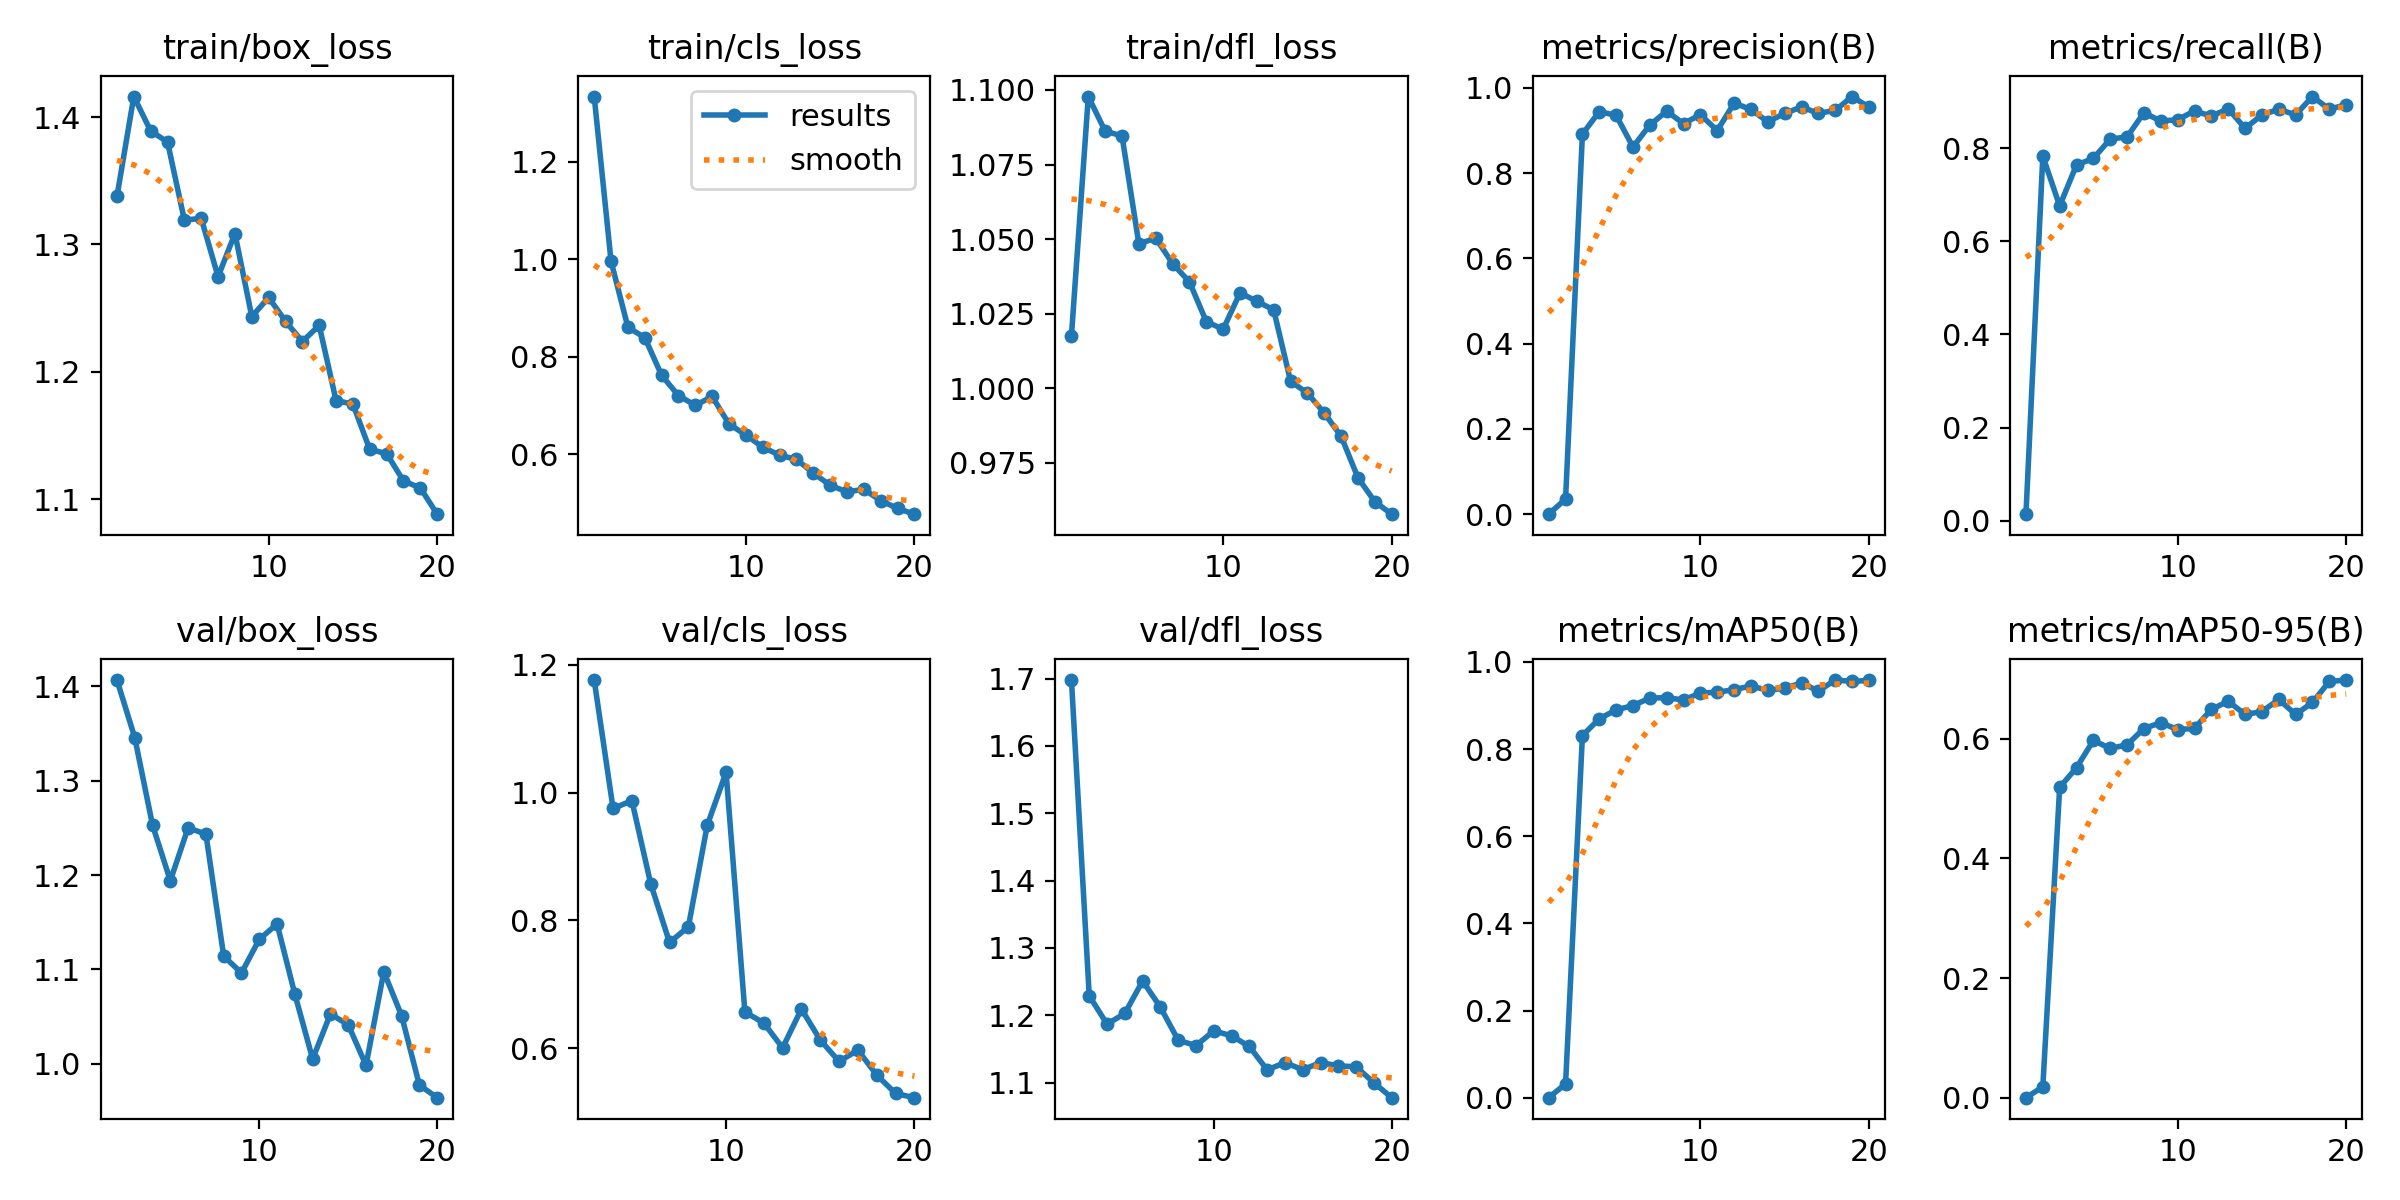

In [ ]:
Image(filename=f'/content/runs/detect/train8/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train8/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Tennis-Balls-11/valid/labels.cache... 124 images, 1 backgrounds, 0 corrupt: 100% 124/124 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.50it/s]
                   all        124        216      0.955      0.894      0.954      0.702
Speed: 3.9ms preprocess, 22.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train8/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/65 /content/Tennis-Balls-11/test/images/20220304_124311_jpg.rf.699601e34a84717ad840d06ff80da43d.jpg: 640x640 2 Tennis balls, 36.9ms
image 2/65 /content/Tennis-Balls-11/test/images/20220304_124312_jpg.rf.555e63a8ba094261f6565f423af705a3.jpg: 640x640 2 Tennis balls, 35.4ms
image 3/65 /content/Tennis-Balls-11/test/images/20220304_124313_jpg.rf.ee36caec6ecee6f9e165e0fc0291120f.jpg: 640x640 1 Tennis ball, 35.3ms
image 4/65 /content/Tennis-Balls-11/test/images/20220304_124315_jpg.rf.c5b8fa02d4cf15129a071d42fc0960d2.jpg: 640x640 2 Tennis balls, 35.3ms
image 5/65 /content/Tennis-Balls-11/test/images/20220304_124327_jpg.rf.e80c15579ad51001fefccbeac08f42bb.jpg: 640x640 2 Tennis balls, 26.1ms
image 6/65 /content/Tennis-Balls-11/test/images/20220304_124329_jpg.rf.27496386111ecac91f5243ec4d8a199a.jpg: 640x640 2 Tennis balls

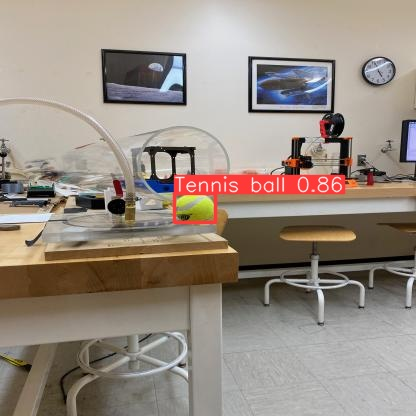

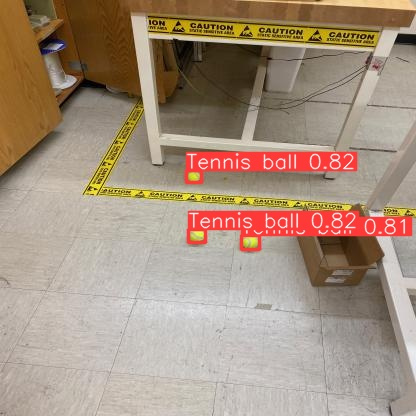

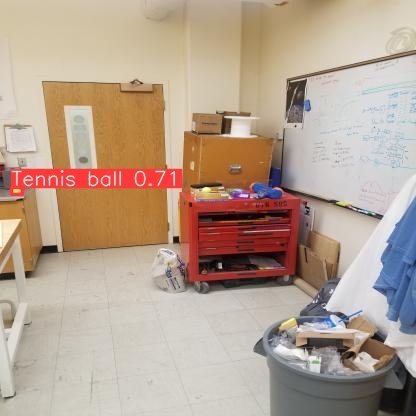

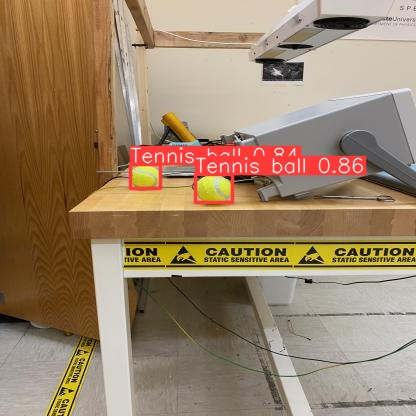

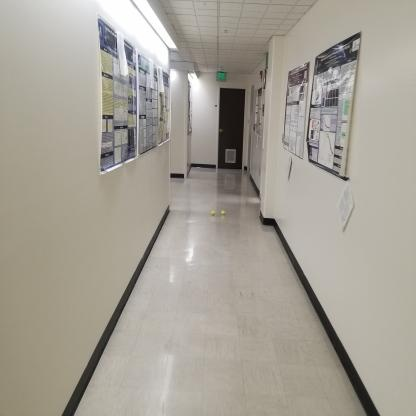

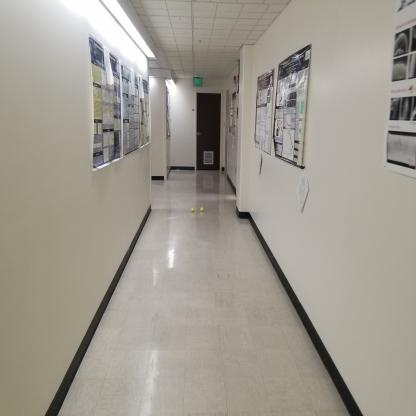

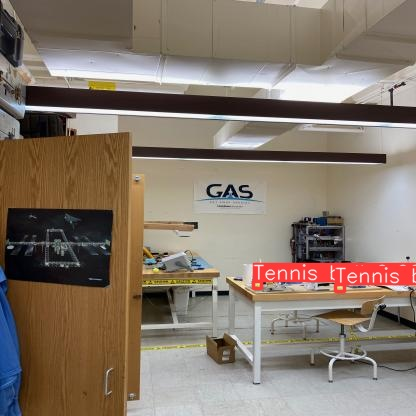

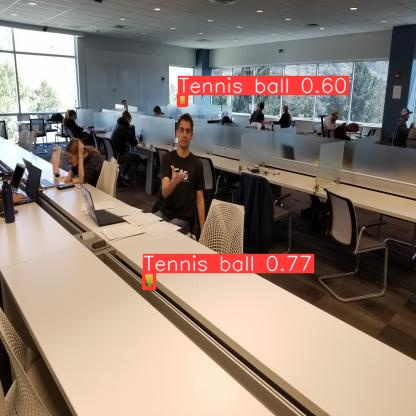

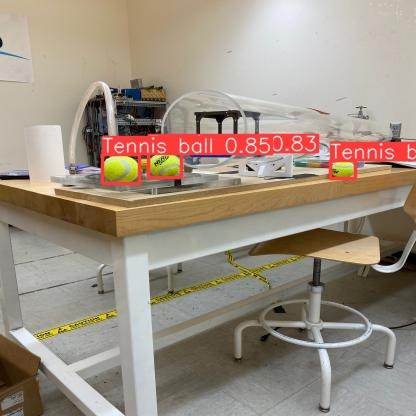

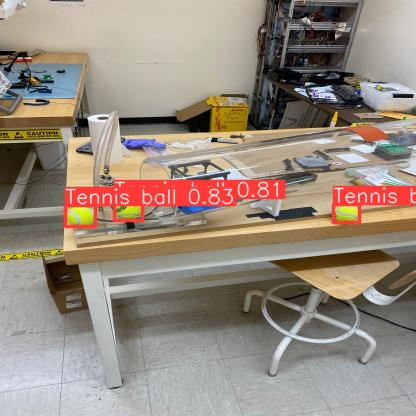

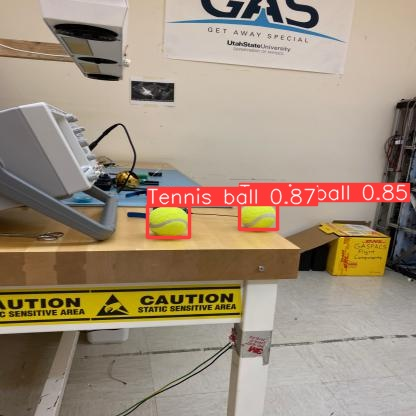

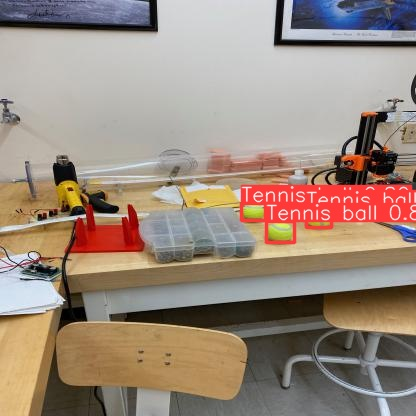

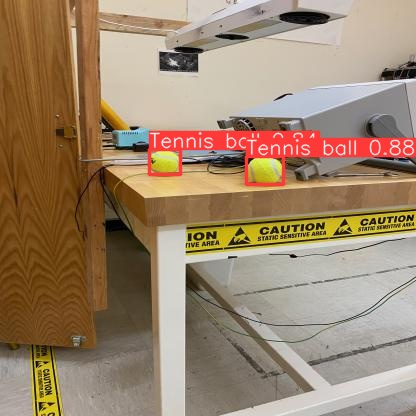

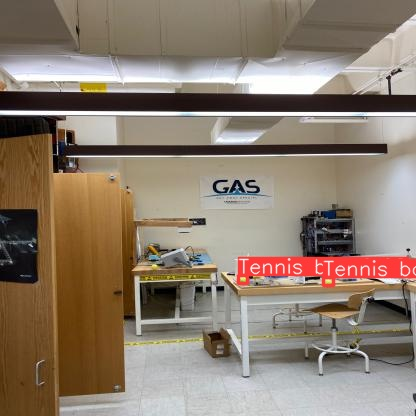

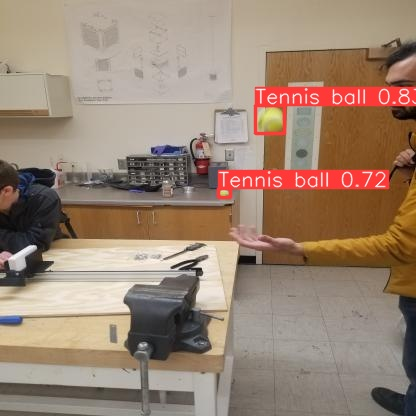

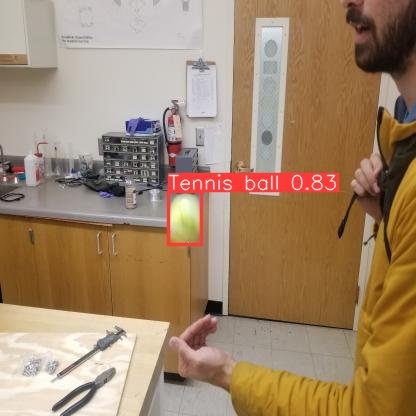

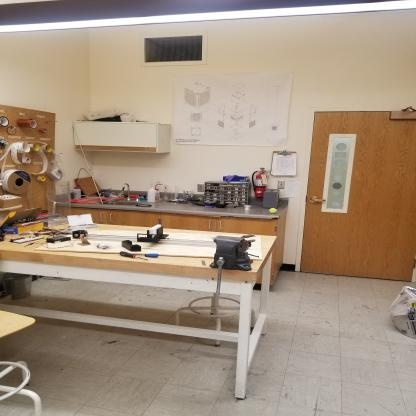

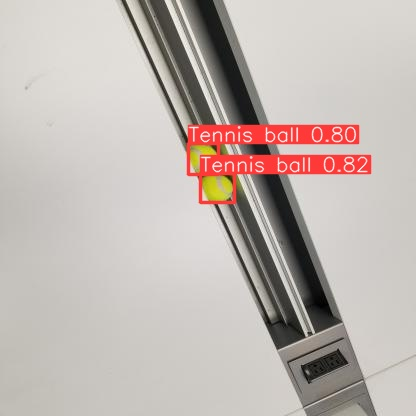

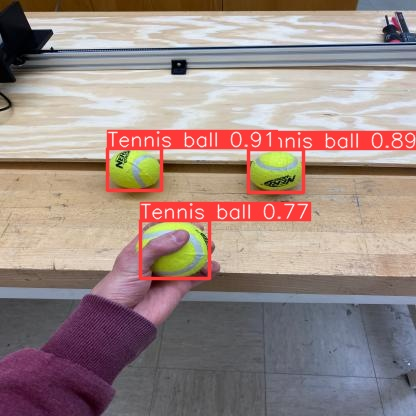

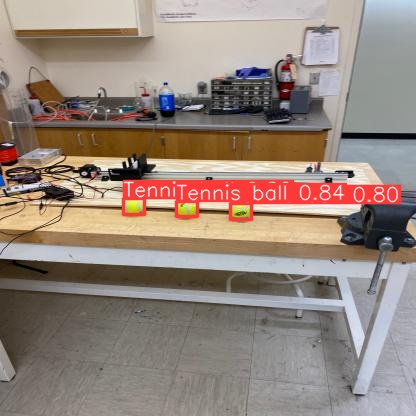

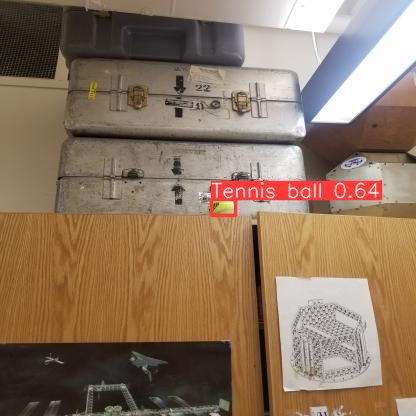

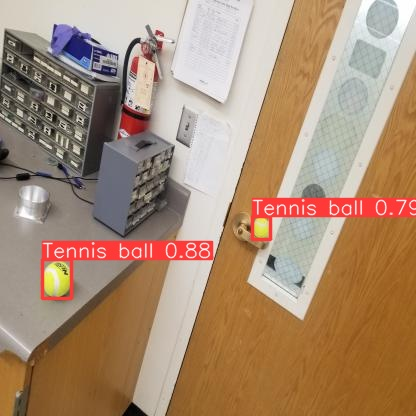

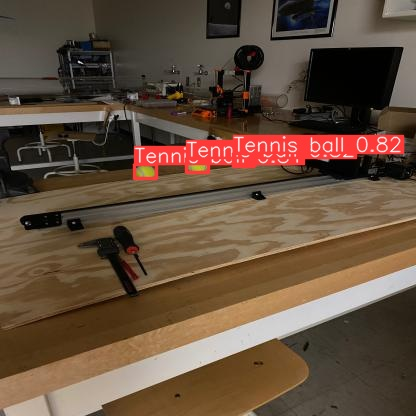

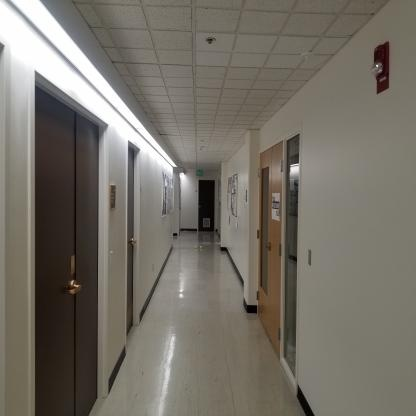

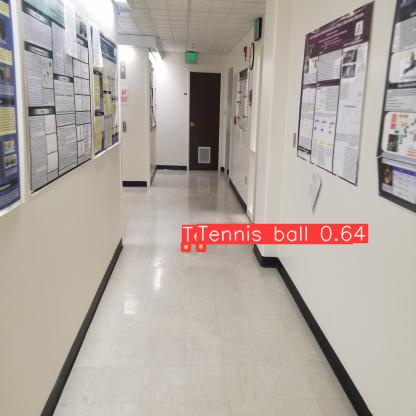

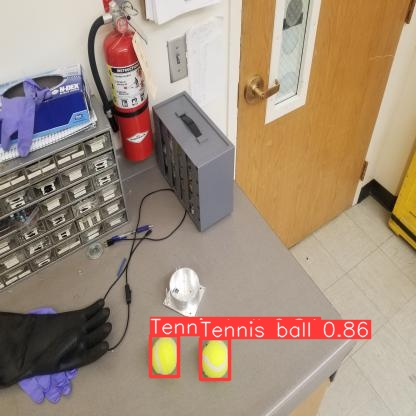

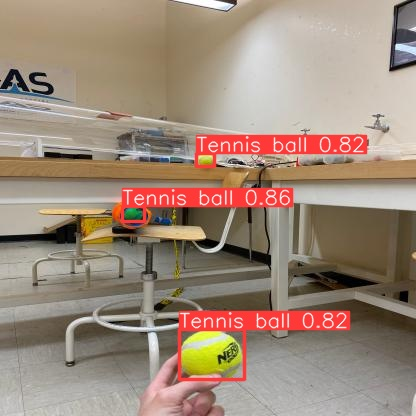

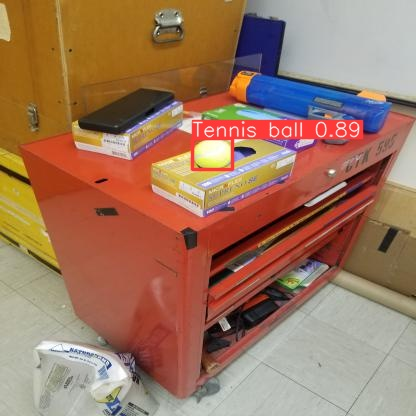

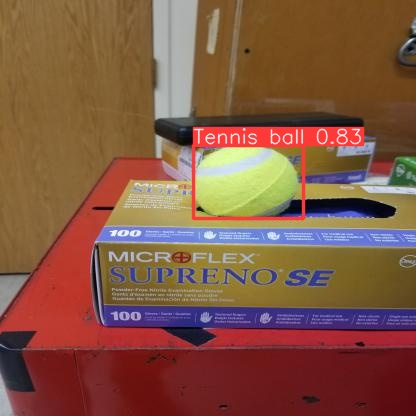

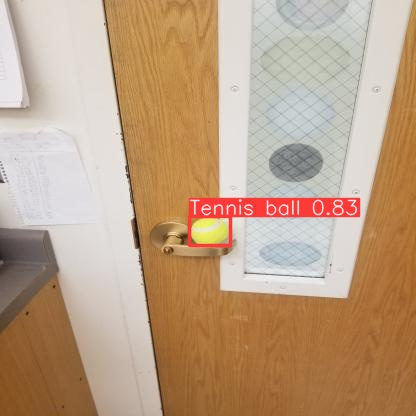

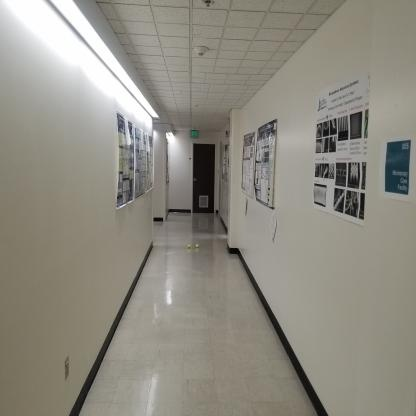

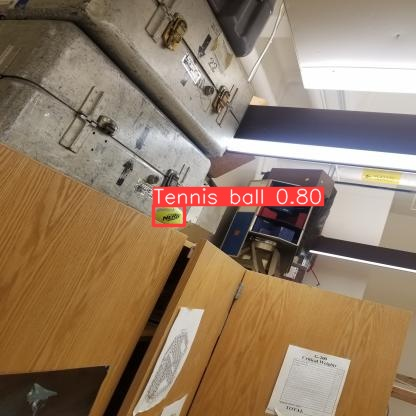

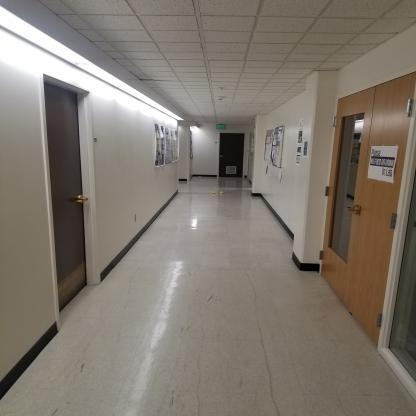

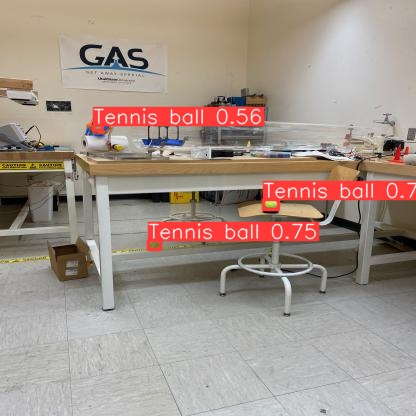

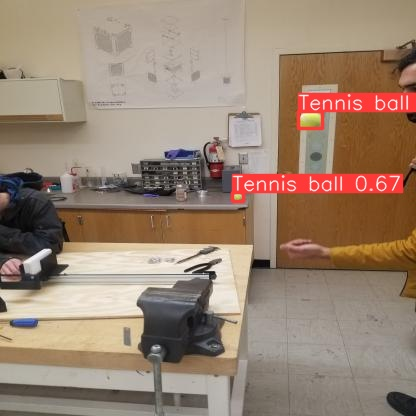

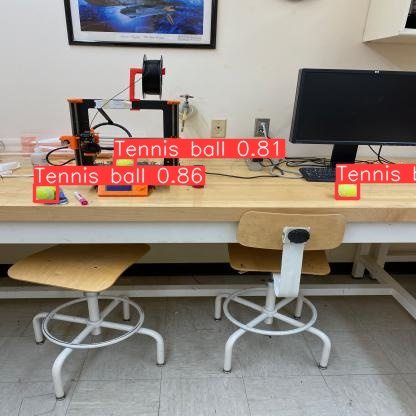

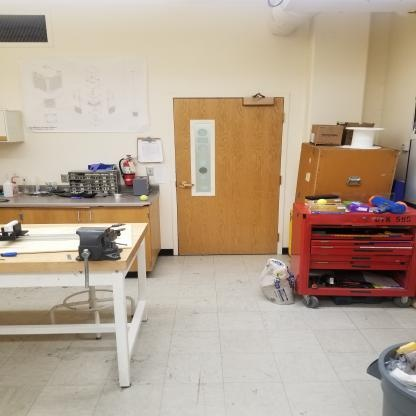

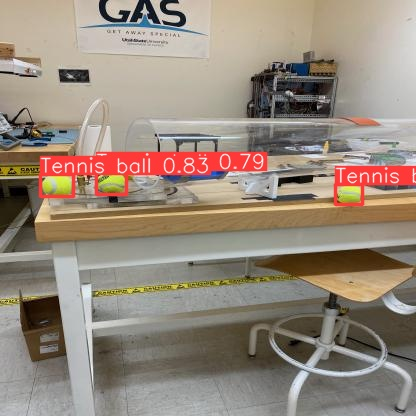

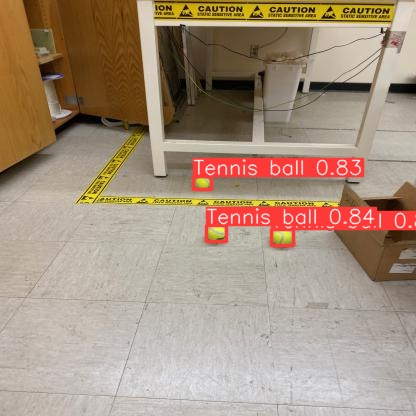

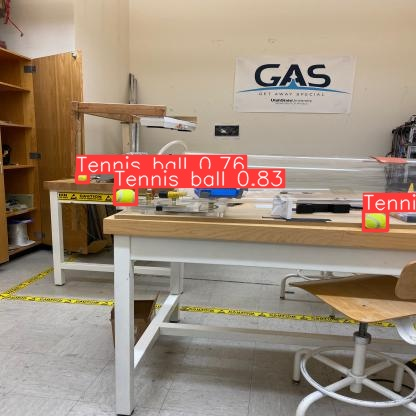

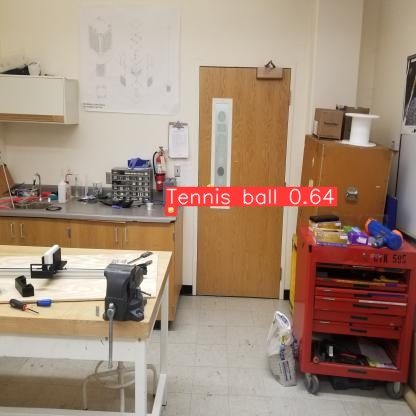

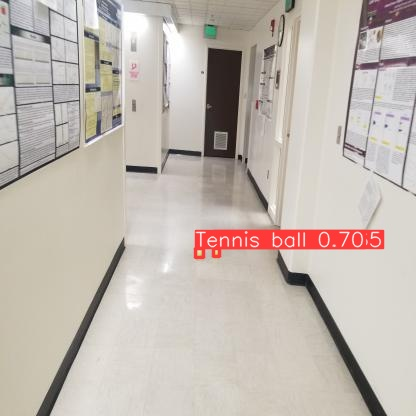

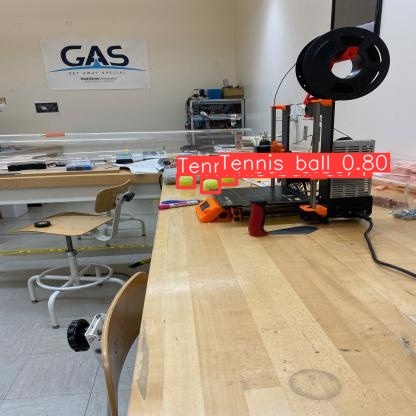

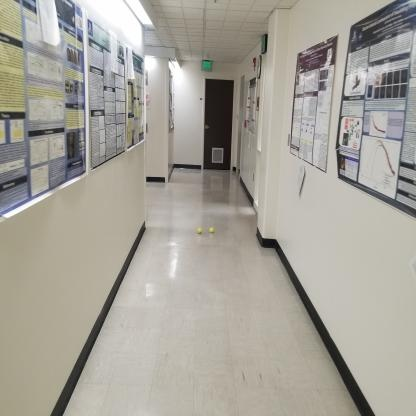

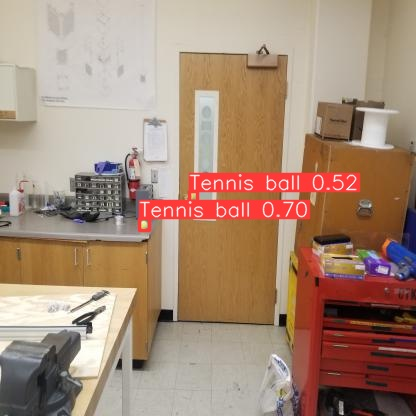

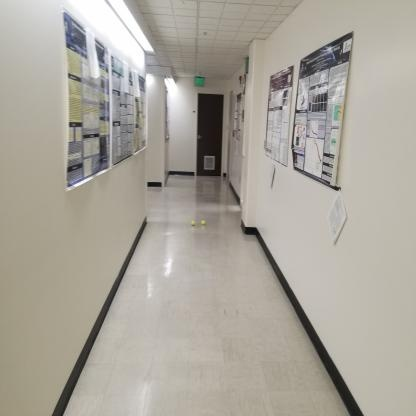

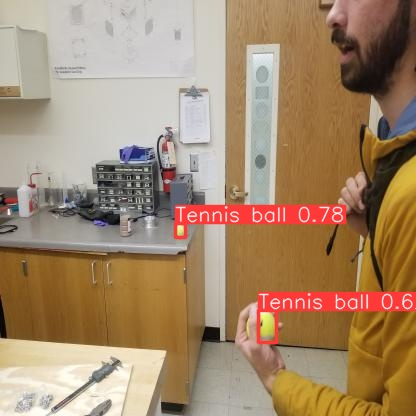

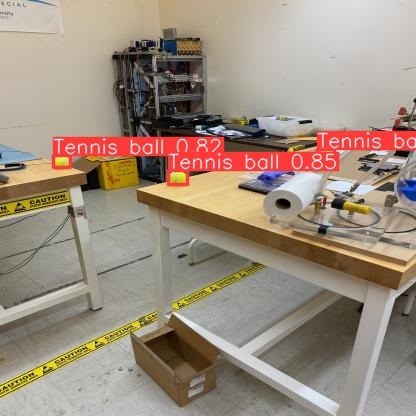

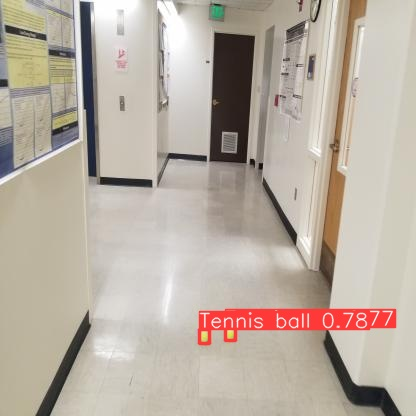

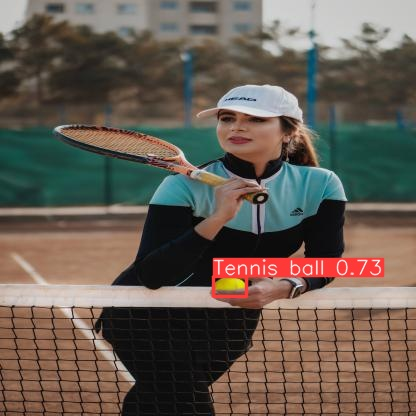

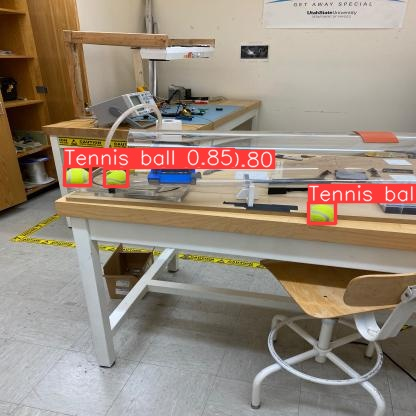

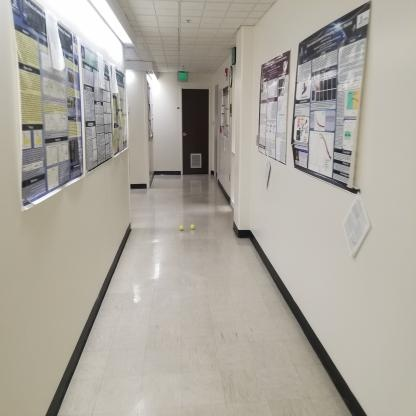

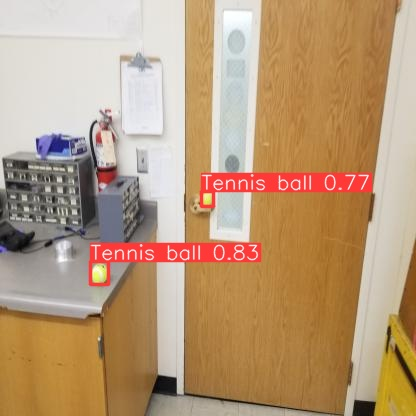

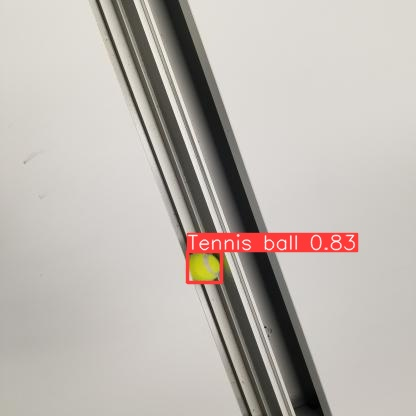

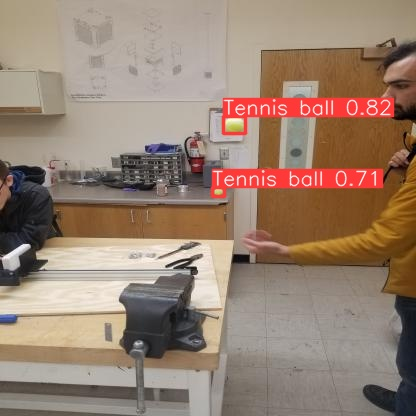

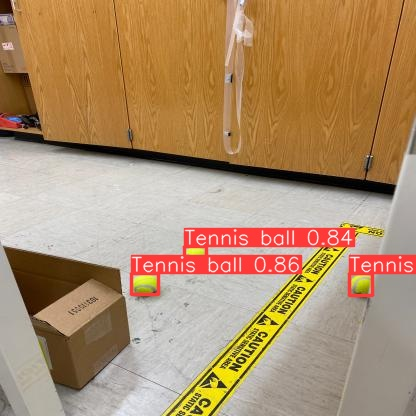

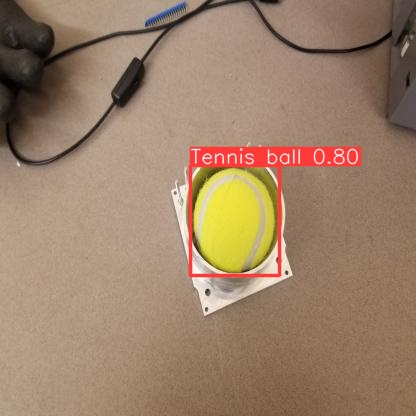

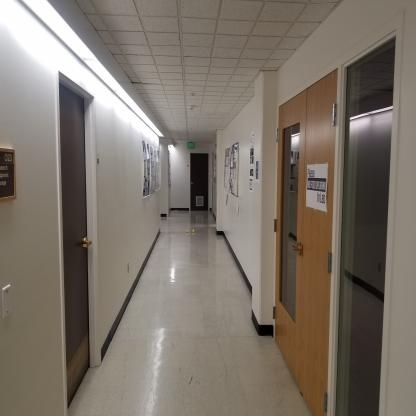

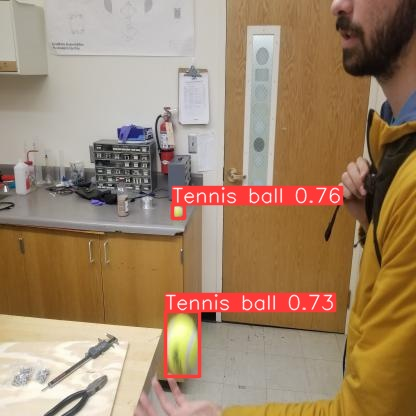

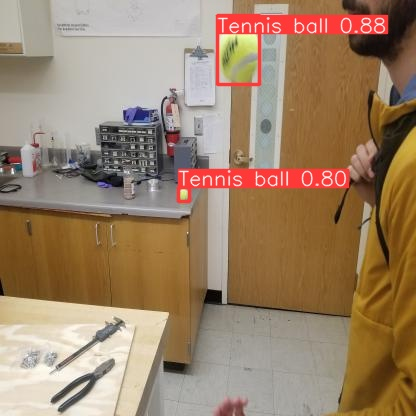

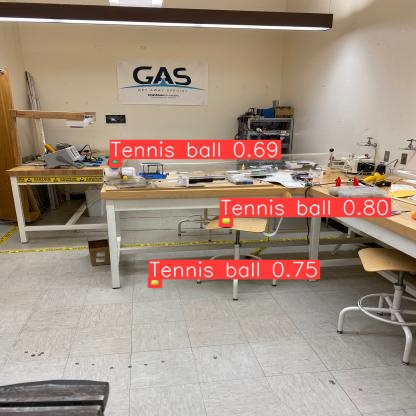

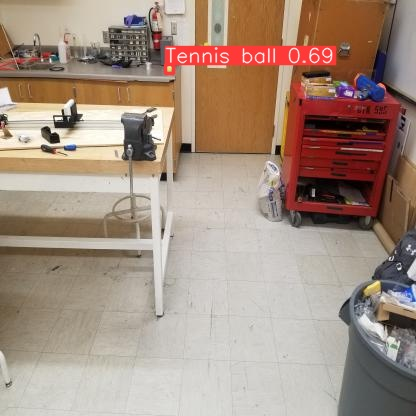

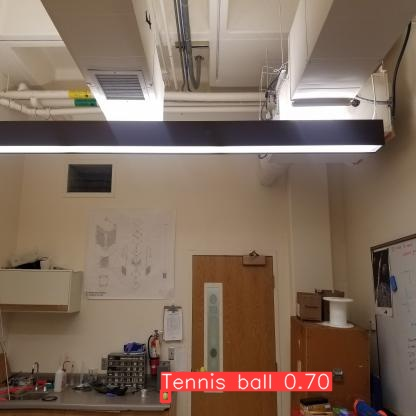

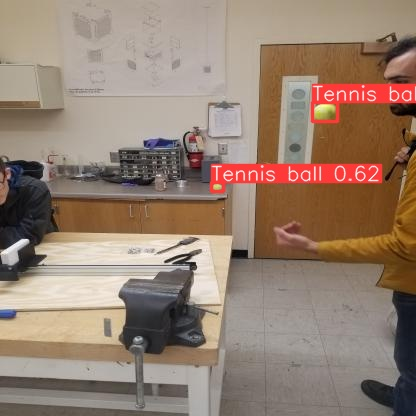

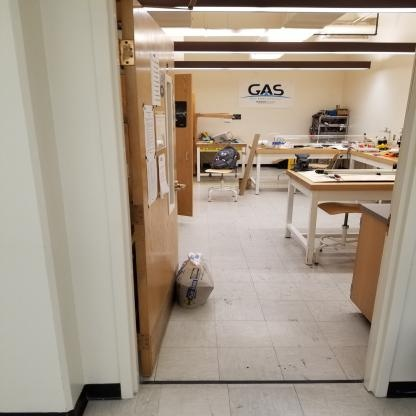

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
!zip -r tennis-vision-training.zip /content/runs/detect/train8


  adding: content/runs/detect/train8/ (stored 0%)
  adding: content/runs/detect/train8/val_batch1_labels.jpg (deflated 9%)
  adding: content/runs/detect/train8/val_batch2_pred.jpg (deflated 8%)
  adding: content/runs/detect/train8/results.png (deflated 7%)
  adding: content/runs/detect/train8/train_batch0.jpg (deflated 2%)
  adding: content/runs/detect/train8/args.yaml (deflated 51%)
  adding: content/runs/detect/train8/P_curve.png (deflated 19%)
  adding: content/runs/detect/train8/val_batch2_labels.jpg (deflated 8%)
  adding: content/runs/detect/train8/val_batch0_pred.jpg (deflated 8%)
  adding: content/runs/detect/train8/weights/ (stored 0%)
  adding: content/runs/detect/train8/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train8/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train8/events.out.tfevents.1702195156.a66bebf30183.8924.0 (deflated 93%)
  adding: content/runs/detect/train8/confusion_matrix.png (deflated 38%)
  adding: content/runs/detect/train8/

In [ ]:
!zip -r tennis-vision-validation.zip /content/runs/detect/val

  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 7%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 9%)
  adding: content/runs/detect/val/P_curve.png (deflated 19%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 9%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 8%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 38%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 36%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/val/R_curve.png (deflated 17%)
  adding: content/runs/detect/val/F1_curve.png (deflated 16%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 8%)
  adding: content/runs/detect/val/PR_curve.png (deflated 24%)
